# Loading datasets from location with preprocessed data

In [1]:
import os

path_to_local_folder = os.path.expanduser('~/charon_local')
filter_include = ["synth", "A04hm_H1"]
filter_exclude = ["failed", "nocond"]

### gather the folders and filter the names for selection

In [2]:
from raw_data import get_subfolder_paths_processed, filter_datasets

subfolders = get_subfolder_paths_processed(path_to_local_folder)
subfolders_filt = filter_datasets(subfolders, filter_include, filter_exclude)
subfolders_filt

['/home/ber0061/charon_local/borehole_H1/synth_A04hm_H1_20230418',
 '/home/ber0061/charon_local/borehole_H1/synth_A04hm_H1_20230329',
 '/home/ber0061/charon_local/borehole_H1/synth_A04hm_H1_20230412']

### Load insides of folders into one MultiRawData object

In [3]:
from raw_data import MultiRawData

all_raw_data = MultiRawData()
all_raw_data.load_from_folders_hdf5(subfolders_filt)

# Some demostration on resulting object

In [4]:
all_raw_data.print_statistics()


raw data: no_samples 81141
raw data: no_nonconverging 8398
raw data: p (81141, 8)
raw data: w (81141, 1)
raw_data: np.sum(weights): 1455140.0
raw_data: all_sizes: {'types': (81141,), 'stages': (81141,), 'chains': (81141,), 'tags': (81141,), 'parameters': (81141, 8), 'observations': (81141, 30), 'parameters_normalized': (81141, 8), 'weights': (81141, 1), 'run_ids': (81141,)}


In [6]:
all_raw_data_filter_tag = all_raw_data.filter(tags=[1])
all_raw_data_filter_tag_wrong = all_raw_data.filter(tags=[-1])


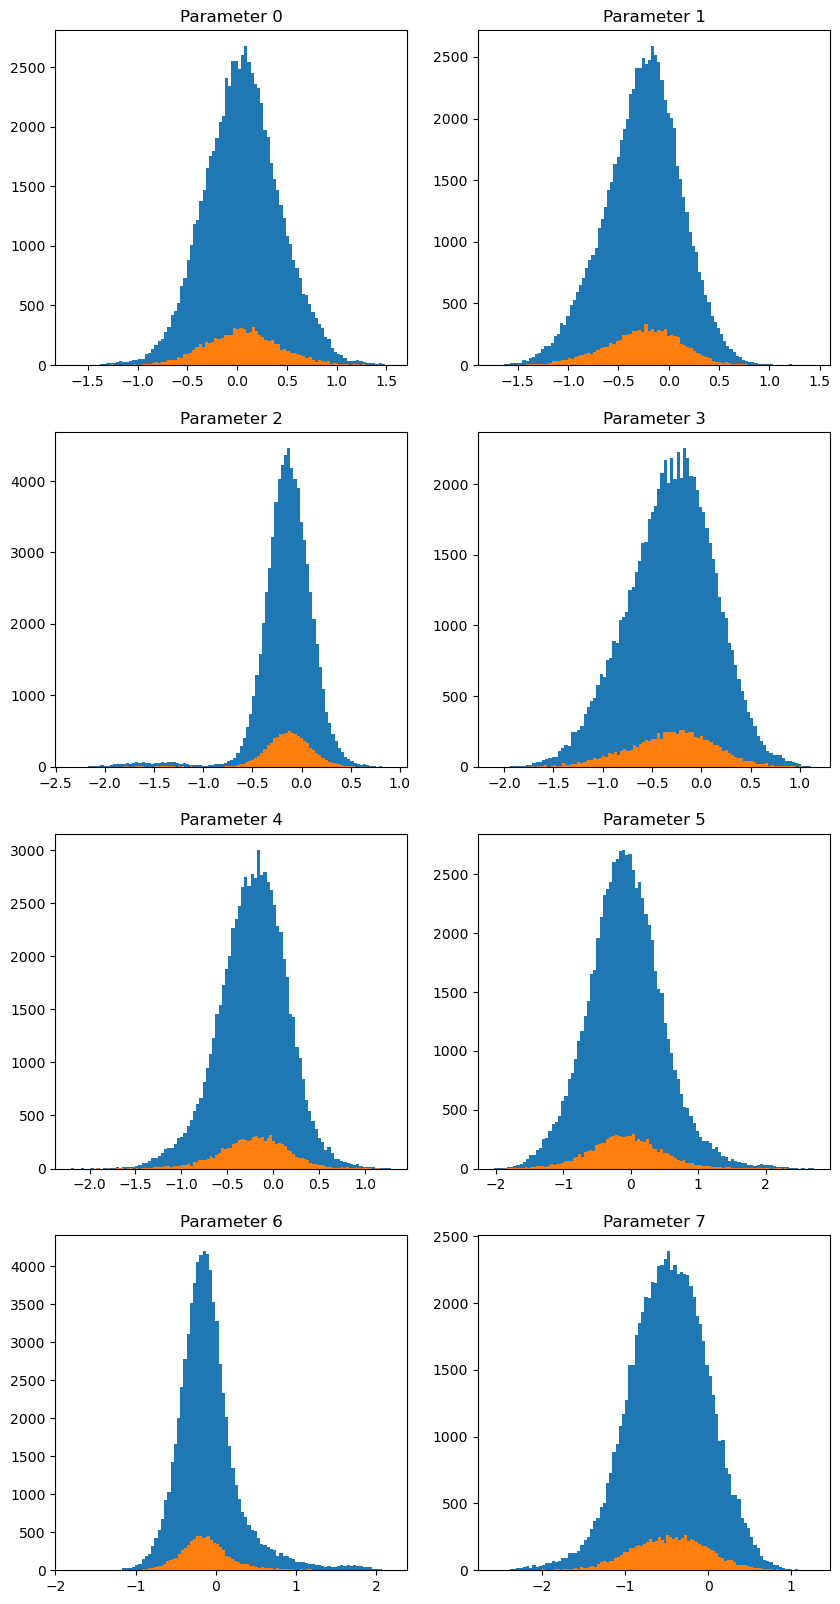

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# make 8 subplots 4 rows, 2 columns
fig, axs = plt.subplots(4, 2, figsize=(10, 20))
axs = axs.ravel()
for i in range(8):
# plot histogram of observations
    axs[i].hist(all_raw_data_filter_tag.parameters_normalized[:,i], bins=100)
    axs[i].hist(all_raw_data_filter_tag_wrong.parameters_normalized[:,i], bins=100)
    axs[i].set_title(f"Parameter {i}")
